# Preparación proyecto

## Librerías

In [ ]:
!pip install kmodes
!pip install prince
!pip install efficient_apriori
!pip install pyfpgrowth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5505 sha256=cf057ba139ef16e00664651faa2ec11f21010fa90e4ce66d5cbf8f9653cf80b5
  Stored in directory: /root/.cache/pip/wheels/29/e2/a7/ccb34c35e2c6737d3f09b53784f4323b7ff556a5f02096c70d
Successfully built pyfpgrowth


In [ ]:
# Python
import pandas as pd 
import numpy as np
from scipy.stats import trim_mean
from numpy import mean, absolute 
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import statistics
import pyfpgrowth
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import tree,svm
from sklearn.tree import export_graphviz
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from efficient_apriori import apriori
import prince # for multiple correspondence analysis
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, precision_score, recall_score, f1_score, accuracy_score , roc_curve
from datetime import datetime
from kmodes.kmodes import KModes
from pydotplus import graph_from_dot_data

## Datos Mas Familias Accion

In [ ]:
data = pd.read_csv("/content/Beneficiarios_M_s_Familias_en_Acci_n_process.csv",sep=',')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Bancarizado                        100000 non-null  object 
 1   CodigoDepartamentoAtencion         100000 non-null  int64  
 2   CodigoMunicipioAtencion            100000 non-null  int64  
 3   Discapacidad                       100000 non-null  object 
 4   EstadoBeneficiario                 100000 non-null  object 
 5   Etnia                              100000 non-null  object 
 6   FechaInscripcionBeneficiario       100000 non-null  object 
 7   Genero                             100000 non-null  object 
 8   NivelEscolaridad                   100000 non-null  object 
 9   NombreDepartamentoAtencion         100000 non-null  object 
 10  NombreMunicipioAtencion            100000 non-null  object 
 11  Pais                               10000

## Datos Indice Desarrollo Humano departamental

In [ ]:
idh = pd.read_csv('/content/idh_dep.csv')
idh['IDH'] = idh['IDH'].str.replace(',','.').astype('float')

### Estandariza texto

In [ ]:
idh['Departamento'] = idh['Departamento'].str.replace('á','a')
idh['Departamento'] = idh['Departamento'].str.replace('é','e')
idh['Departamento'] = idh['Departamento'].str.replace('í','i')
idh['Departamento'] = idh['Departamento'].str.replace('ó','o')
idh['Departamento'] = idh['Departamento'].str.replace('ú','u')
idh['Departamento'] = idh['Departamento'].apply(lambda x: x.strip())
idh['Departamento'] = idh['Departamento'].apply(lambda x: str.upper(x))
idh['Departamento'] = idh['Departamento'].str.replace('SAN ANDRES Y PROVIDENCIA','SAN ANDRES')
idh['Departamento'] = idh['Departamento'].str.replace('VALLE DEL CAUCA','VALLE')

### Binning IDH

In [ ]:
idh['rango_idh'] = pd.qcut(idh['IDH'],4)
idh

Departamento    IDH       rango_idh
0               BOGOTA  0.813  (0.774, 0.813]
1                VALLE  0.791  (0.774, 0.813]
2           SAN ANDRES  0.789  (0.774, 0.813]
3            ATLANTICO  0.786  (0.774, 0.813]
4              QUINDIO  0.784  (0.774, 0.813]
5               CALDAS  0.778  (0.774, 0.813]
6                 META  0.778  (0.774, 0.813]
7            SANTANDER  0.778  (0.774, 0.813]
8         CUNDINAMARCA  0.774   (0.75, 0.774]
9            ANTIOQUIA  0.772   (0.75, 0.774]
10           RISARALDA  0.761   (0.75, 0.774]
11              BOYACA  0.760   (0.75, 0.774]
12             BOLIVAR  0.756   (0.75, 0.774]
13            GUAVIARE  0.755   (0.75, 0.774]
14             VICHADA  0.754   (0.75, 0.774]
15  NORTE DE SANTANDER  0.750   (0.719, 0.75]
16            CASANARE  0.750   (0.719, 0.75]
17              TOLIMA  0.747   (0.719, 0.75]
18               SUCRE  0.744   (0.719, 0.75]
19              ARAUCA  0.740   (0.719, 0.75]
20               CESAR  0.729   (0.719, 0.75]
21           MAGDALENA  0.726   (0.719, 0.75]
22               HUILA  0.726   (0.719, 0.75]
23              NARIÑO  0.722   (0.719, 0.75]
24               CAUCA  0.719  (0.638, 0.719]
25            AMAZONAS  0.717  (0.638, 0.719]
26             CAQUETA  0.717  (0.638, 0.719]
27            PUTUMAYO  0.717  (0.638, 0.719]
28             CORDOBA  0.716  (0.638, 0.719]
29               CHOCO  0.696  (0.638, 0.719]
30          LA GUAJIRA  0.695  (0.638, 0.719]
31             GUAINIA  0.670  (0.638, 0.719]
32              VAUPES  0.639  (0.638, 0.719]

# Ajustes de columnas del conjunto de datos, preprocesamiento inicial

## Agrupación de valores similares

### Etnia

In [ ]:
data.Etnia = data.Etnia.str.replace('^AFRO.*', 'AFROCOLOMBIANO', regex=True)
data.Etnia = data.Etnia.str.replace('ROM O GITANO', 'ROM', regex=True)

In [ ]:
data.Etnia.unique()

array(['ND', 'INDIGENA', 'AFROCOLOMBIANO', 'MESTIZO', 'ROM', 'RAIZAL',
       'PALENQUERO'], dtype=object)

### Pais

In [ ]:
data.Pais = data.Pais.str.replace('^C.*', 'Colombia', regex=True)
data.Pais = data.Pais.str.replace('^\d.*', 'Colombia', regex=True)

## Eliminación columnas sin valor informativo

### Pais y TipoAsignacionBeneficio

In [ ]:
data.Pais.unique()

array(['ND', 'Colombia'], dtype=object)

In [ ]:
data.TipoAsignacionBeneficio.unique()

array(['MONETARIO', 'ND'], dtype=object)

In [ ]:
data.drop('Pais', axis=1, inplace=True)
data.drop('TipoAsignacionBeneficio', axis=1, inplace=True)

## Unión MFA y IDH

Todos los valores quedan con IDH asociado al departamento correspondiente.

In [ ]:
data = data.merge(idh,left_on= 'NombreDepartamentoAtencion',right_on= 'Departamento',how = 'left').drop(columns='Departamento')
data.head()

Bancarizado  CodigoDepartamentoAtencion  CodigoMunicipioAtencion  \
0          NO                          23                    23660   
1          NO                          70                    70233   
2          ND                           5                     5001   
3          NO                          18                    18592   
4          NO                           8                     8433   

  Discapacidad EstadoBeneficiario Etnia FechaInscripcionBeneficiario  Genero  \
0           NO             ACTIVO    ND                   2012-11-01  Hombre   
1           NO          NO ACTIVO    ND                   2012-12-01   Mujer   
2           ND          NO ACTIVO    ND                   2012-10-01   Mujer   
3           NO          NO ACTIVO    ND                   2012-12-01   Mujer   
4           NO             ACTIVO    ND                   2015-05-01   Mujer   

  NivelEscolaridad NombreDepartamentoAtencion  ... TipoDocumento  \
0               ND                    CORDOBA  ...            CC   
1               ND                      SUCRE  ...            TI   
2               ND                  ANTIOQUIA  ...            CC   
3               ND                    CAQUETA  ...            TI   
4       SECUNDARIA                  ATLANTICO  ...            TI   

  TipoPoblacion RangoBeneficioConsolidadoAsignado  \
0        SISBEN             4.500.001 - 6.000.000   
1        UNIDOS                     0 - 1.500.000   
2        UNIDOS                     0 - 1.500.000   
3            ND                     0 - 1.500.000   
4   DESPLAZADOS                     0 - 1.500.000   

  RangoUltimoBeneficioAsignado FechaUltimoBeneficioAsignado RangoEdad Titular  \
0                0 - 1.300.000                   2018-01-01     30-49      SI   
1                0 - 1.300.000                   1900-01-01     18-29      NO   
2                0 - 1.300.000                   1900-01-01     18-29      NO   
3                0 - 1.300.000                   1900-01-01     18-29      NO   
4                0 - 1.300.000                   1900-01-01     18-29      NO   

  CantidadDeBeneficiarios    IDH       rango_idh  
0                     1.0  0.716  (0.638, 0.719]  
1                    81.0  0.744   (0.719, 0.75]  
2                    65.0  0.772   (0.75, 0.774]  
3                    18.0  0.717  (0.638, 0.719]  
4                     5.0  0.786  (0.774, 0.813]  

[5 rows x 22 columns]

In [ ]:
data[pd.isnull(data.IDH)==True]

Empty DataFrame
Columns: [Bancarizado, CodigoDepartamentoAtencion, CodigoMunicipioAtencion, Discapacidad, EstadoBeneficiario, Etnia, FechaInscripcionBeneficiario, Genero, NivelEscolaridad, NombreDepartamentoAtencion, NombreMunicipioAtencion, TipoBeneficio, TipoDocumento, TipoPoblacion, RangoBeneficioConsolidadoAsignado, RangoUltimoBeneficioAsignado, FechaUltimoBeneficioAsignado, RangoEdad, Titular, CantidadDeBeneficiarios, IDH, rango_idh]
Index: []

[0 rows x 22 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Bancarizado                        100000 non-null  object  
 1   CodigoDepartamentoAtencion         100000 non-null  int64   
 2   CodigoMunicipioAtencion            100000 non-null  int64   
 3   Discapacidad                       100000 non-null  object  
 4   EstadoBeneficiario                 100000 non-null  object  
 5   Etnia                              100000 non-null  object  
 6   FechaInscripcionBeneficiario       100000 non-null  object  
 7   Genero                             100000 non-null  object  
 8   NivelEscolaridad                   100000 non-null  object  
 9   NombreDepartamentoAtencion         100000 non-null  object  
 10  NombreMunicipioAtencion            100000 non-null  object  
 11  TipoBeneficio              

## Datos faltantes

Los datos ND representan 'No Definido' y se reemplazan por NaN para poder aprovechar funciones del DataFrame

In [ ]:
data = data.replace('ND',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 100000
Number of attributes = 22
Number of missing values:
	Bancarizado: 4297
	CodigoDepartamentoAtencion: 0
	CodigoMunicipioAtencion: 0
	Discapacidad: 2273
	EstadoBeneficiario: 0
	Etnia: 87853
	FechaInscripcionBeneficiario: 0
	Genero: 7
	NivelEscolaridad: 68456
	NombreDepartamentoAtencion: 0
	NombreMunicipioAtencion: 0
	TipoBeneficio: 52048
	TipoDocumento: 0
	TipoPoblacion: 5335
	RangoBeneficioConsolidadoAsignado: 0
	RangoUltimoBeneficioAsignado: 0
	FechaUltimoBeneficioAsignado: 0
	RangoEdad: 0
	Titular: 0
	CantidadDeBeneficiarios: 0
	IDH: 0
	rango_idh: 0


In [ ]:
data[data['NivelEscolaridad']=='SECUNDARIA'].groupby('RangoEdad')['CantidadDeBeneficiarios'].sum()

RangoEdad
06-17    280047.0
18-29    735215.0
30-49         2.0
50-65         2.0
>65           1.0
Name: CantidadDeBeneficiarios, dtype: float64

In [ ]:
data[data['NivelEscolaridad']=='PRIMARIA'].groupby('RangoEdad')['CantidadDeBeneficiarios'].sum()

RangoEdad
06-17    953646.0
18-29     10691.0
30-49         2.0
50-65         1.0
>65           1.0
Name: CantidadDeBeneficiarios, dtype: float64

En genero aplicamos el fillna usando la moda de la variable

In [ ]:
print(data[pd.isnull(data.Genero)==True].head())
moda_gen = statistics.mode(data['Genero'])
moda_ban = statistics.mode(data['Bancarizado'])
moda_TP = statistics.mode(data['TipoPoblacion'])
print(moda_gen)
data['Genero'] = data['Genero'].fillna(moda_gen)
data['Bancarizado'] = data['Bancarizado'].fillna(moda_ban)
data['Etnia'] = data['Etnia'].fillna('NINGUNA')
data['Discapacidad'] = data['Discapacidad'].fillna('NO')
data['TipoPoblacion'] = data['TipoPoblacion'].fillna(moda_TP)

m1 = data['RangoEdad'] == '06-17'
data.loc[m1,'NivelEscolaridad'] = data.loc[m1,'NivelEscolaridad'].fillna('PRIMARIA')
data['NivelEscolaridad'] = data['NivelEscolaridad'].fillna('SECUNDARIA')

data.loc[m1,'TipoBeneficio'] = data.loc[m1,'TipoBeneficio'].fillna(statistics.mode(data.loc[m1,'TipoBeneficio']))
data['TipoBeneficio'] = data['TipoBeneficio'].fillna('EDUCACIÓN SECUNDARIA')

      Bancarizado  CodigoDepartamentoAtencion  CodigoMunicipioAtencion  \
19440         NaN                          19                    19050   
35280         NaN                          20                    20295   
35885         NaN                          13                    13001   
43265         NaN                          23                    23001   
47135         NaN                          54                    54498   

      Discapacidad EstadoBeneficiario Etnia FechaInscripcionBeneficiario  \
19440           NO             ACTIVO   NaN                   2013-01-01   
35280           NO             ACTIVO   NaN                   2012-12-01   
35885           NO             ACTIVO   NaN                   2012-10-01   
43265           NO             ACTIVO   NaN                   2012-10-01   
47135           NO             ACTIVO   NaN                   2013-11-01   

      Genero NivelEscolaridad NombreDepartamentoAtencion  ... TipoDocumento  \
19440    NaN       

In [ ]:
data.groupby('NivelEscolaridad')['CantidadDeBeneficiarios'].sum()

NivelEscolaridad
PRIMARIA      1283426.0
SECUNDARIA    3361987.0
TECNICO             2.0
TECNOLOGO           1.0
TRANSICION      49011.0
Name: CantidadDeBeneficiarios, dtype: float64

In [ ]:
print(data[pd.isnull(data.Genero)==True].head())
data.groupby('Genero').size()

Empty DataFrame
Columns: [Bancarizado, CodigoDepartamentoAtencion, CodigoMunicipioAtencion, Discapacidad, EstadoBeneficiario, Etnia, FechaInscripcionBeneficiario, Genero, NivelEscolaridad, NombreDepartamentoAtencion, NombreMunicipioAtencion, TipoBeneficio, TipoDocumento, TipoPoblacion, RangoBeneficioConsolidadoAsignado, RangoUltimoBeneficioAsignado, FechaUltimoBeneficioAsignado, RangoEdad, Titular, CantidadDeBeneficiarios, IDH, rango_idh]
Index: []

[0 rows x 22 columns]


Genero
Hombre    38854
Mujer     61146
dtype: int64

## Conversión tipo fecha

### FechaInscripcionBeneficiario y FechaUltimoBeneficioAsignado

In [ ]:
data['FechaInscripcionBeneficiario'] = pd.to_datetime(data['FechaInscripcionBeneficiario'],format="%Y/%m/%d")
data['FechaUltimoBeneficioAsignado'] = pd.to_datetime(data['FechaUltimoBeneficioAsignado'],format="%Y/%m/%d")

### Reemplazar nulos en fechas

Remover los nulos en fechas, que tiene  valor default '1900-01-01', uno reemplazo con nulos, ya que es la fecha de ultima asignación de beneficio, si lo reemplazamos por una moda o una media, podría generar incongruencias como que el beneficio asginado, sea menor que el ultimo recibido, el otro si aplicamos un replace por la moda.

In [ ]:
nulo_date = datetime.strptime('1900-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
data['FechaUltimoBeneficioAsignado'].replace(nulo_date,np.nan,inplace=True)
data['FechaInscripcionBeneficiario'].replace(nulo_date,statistics.mode(data['FechaInscripcionBeneficiario']),inplace=True)

## Unión columnas de mismo valor informativo

### CodigoDepartamentoAtencion y NombreDepartamentoAtencion

In [ ]:
data.CodigoDepartamentoAtencion = data.CodigoDepartamentoAtencion.astype(str)

In [ ]:
data['DepartamentoAtencion'] = data['CodigoDepartamentoAtencion'] +" - "+ data['NombreDepartamentoAtencion']

In [ ]:
data['DepartamentoAtencion']

0          23 - CORDOBA
1            70 - SUCRE
2         5 - ANTIOQUIA
3          18 - CAQUETA
4         8 - ATLANTICO
              ...      
99995       73 - TOLIMA
99996      18 - CAQUETA
99997     5 - ANTIOQUIA
99998    66 - RISARALDA
99999    68 - SANTANDER
Name: DepartamentoAtencion, Length: 100000, dtype: object

In [ ]:
data.drop('CodigoDepartamentoAtencion', axis=1, inplace=True)
data.drop('NombreDepartamentoAtencion', axis=1, inplace=True)

### CodigoMunicipioAtencion y NombreMunicipioAtencion

In [ ]:
data.CodigoMunicipioAtencion = data.CodigoMunicipioAtencion.astype(str)

In [ ]:
data['MunicipioAtencion'] = data['CodigoMunicipioAtencion'] +" - "+ data['NombreMunicipioAtencion']

In [ ]:
data['MunicipioAtencion']

0                       23660 - SAHAGUN
1                      70233 - EL ROBLE
2                       5001 - MEDELLIN
3                   18592 - PUERTO RICO
4                        8433 - MALAMBO
                      ...              
99995                 73616 - RIOBLANCO
99996    18753 - SAN VICENTE DEL CAGUAN
99997                    5736 - SEGOVIA
99998                   66001 - PEREIRA
99999                  68250 - EL PEÑON
Name: MunicipioAtencion, Length: 100000, dtype: object

In [ ]:
data.drop('CodigoMunicipioAtencion', axis=1, inplace=True)
data.drop('NombreMunicipioAtencion', axis=1, inplace=True)

## Conversión tipo category

La mayoría de las columnas son registros categóricos por lo que se convierten de una vez para beneficio computacional

In [ ]:
data.nunique()

Bancarizado                             2
Discapacidad                            2
EstadoBeneficiario                      2
Etnia                                   7
FechaInscripcionBeneficiario           74
Genero                                  2
NivelEscolaridad                        5
TipoBeneficio                           8
TipoDocumento                           5
TipoPoblacion                           5
RangoBeneficioConsolidadoAsignado       5
RangoUltimoBeneficioAsignado            1
FechaUltimoBeneficioAsignado            6
RangoEdad                               6
Titular                                 2
CantidadDeBeneficiarios              1254
IDH                                    27
rango_idh                               4
DepartamentoAtencion                   33
MunicipioAtencion                    1106
dtype: int64

In [ ]:
"""data.Bancarizado = data.Bancarizado.astype('category')
data.Discapacidad = data.Discapacidad.astype('category')
data.EstadoBeneficiario = data.EstadoBeneficiario.astype('category')
data.Etnia = data.Etnia.astype('category')
data.Genero = data.Genero.astype('category')
data.NivelEscolaridad = data.NivelEscolaridad.astype('category')
data.TipoBeneficio = data.TipoBeneficio.astype('category')
data.TipoDocumento = data.TipoDocumento.astype('category')
data.TipoPoblacion = data.TipoPoblacion.astype('category')
data.RangoBeneficioConsolidadoAsignado = data.RangoBeneficioConsolidadoAsignado.astype('category')
data.RangoUltimoBeneficioAsignado = data.RangoUltimoBeneficioAsignado.astype('category')
data.RangoEdad = data.RangoEdad.astype('category')
data.Titular = data.Titular.astype('category')"""

"data.Bancarizado = data.Bancarizado.astype('category')\ndata.Discapacidad = data.Discapacidad.astype('category')\ndata.EstadoBeneficiario = data.EstadoBeneficiario.astype('category')\ndata.Etnia = data.Etnia.astype('category')\ndata.Genero = data.Genero.astype('category')\ndata.NivelEscolaridad = data.NivelEscolaridad.astype('category')\ndata.TipoBeneficio = data.TipoBeneficio.astype('category')\ndata.TipoDocumento = data.TipoDocumento.astype('category')\ndata.TipoPoblacion = data.TipoPoblacion.astype('category')\ndata.RangoBeneficioConsolidadoAsignado = data.RangoBeneficioConsolidadoAsignado.astype('category')\ndata.RangoUltimoBeneficioAsignado = data.RangoUltimoBeneficioAsignado.astype('category')\ndata.RangoEdad = data.RangoEdad.astype('category')\ndata.Titular = data.Titular.astype('category')"

# Análisis exploratorio del conjunto de datos

## Descripción del conjunto de datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Bancarizado                        100000 non-null  object        
 1   Discapacidad                       100000 non-null  object        
 2   EstadoBeneficiario                 100000 non-null  object        
 3   Etnia                              100000 non-null  object        
 4   FechaInscripcionBeneficiario       100000 non-null  datetime64[ns]
 5   Genero                             100000 non-null  object        
 6   NivelEscolaridad                   100000 non-null  object        
 7   TipoBeneficio                      100000 non-null  object        
 8   TipoDocumento                      100000 non-null  object        
 9   TipoPoblacion                      100000 non-null  object        
 10  RangoBeneficioConsoli

In [ ]:
data.nunique()

Bancarizado                             2
Discapacidad                            2
EstadoBeneficiario                      2
Etnia                                   7
FechaInscripcionBeneficiario           74
Genero                                  2
NivelEscolaridad                        5
TipoBeneficio                           8
TipoDocumento                           5
TipoPoblacion                           5
RangoBeneficioConsolidadoAsignado       5
RangoUltimoBeneficioAsignado            1
FechaUltimoBeneficioAsignado            6
RangoEdad                               6
Titular                                 2
CantidadDeBeneficiarios              1254
IDH                                    27
rango_idh                               4
DepartamentoAtencion                   33
MunicipioAtencion                    1106
dtype: int64

In [ ]:
print('Bancarizado:',data.Bancarizado.unique())
print('Discapacidad:',data.Discapacidad.unique())
print('EstadoBeneficiario:',data.EstadoBeneficiario.unique())
print('Etnia:',data.Etnia.unique())
print('Genero:',data.Genero.unique())
print('NivelEscolaridad:',data.NivelEscolaridad.unique())
print('TipoBeneficio:',data.TipoBeneficio.unique())
print('TipoDocumento:',data.TipoDocumento.unique())
print('TipoPoblacion:',data.TipoPoblacion.unique())
print('RangoBeneficioConsolidadoAsignado:',data.RangoBeneficioConsolidadoAsignado.unique())
print('RangoUltimoBeneficioAsignado:',data.RangoUltimoBeneficioAsignado.unique())
print('RangoEdad:',data.RangoEdad.unique())
print('Titular:',data.Titular.unique())
print('rango_idh:',data.rango_idh.unique())

Bancarizado: ['NO' 'SI']
Discapacidad: ['NO' 'SI']
EstadoBeneficiario: ['ACTIVO' 'NO ACTIVO']
Etnia: ['NINGUNA' 'INDIGENA' 'AFROCOLOMBIANO' 'MESTIZO' 'ROM' 'RAIZAL'
 'PALENQUERO']
Genero: ['Hombre' 'Mujer']
NivelEscolaridad: ['SECUNDARIA' 'PRIMARIA' 'TRANSICION' 'TECNICO' 'TECNOLOGO']
TipoBeneficio: ['EDUCACIÓN SECUNDARIA' 'NUTRICIÓN MENOR' 'EDUCACIÓN PRIMARIA' 'NUTRICIÓN'
 'TRANSICIÓN' 'TRANSICIÓNNUTRICIÓN MENOR'
 'EDUCACIÓN PRIMARIANUTRICIÓN MENOR' 'EDUCACIÓN SECUNDARIANUTRICIÓN']
TipoDocumento: ['CC' 'TI' 'RC' 'No Definido' 'CE']
TipoPoblacion: ['SISBEN' 'UNIDOS' 'DESPLAZADOS' 'INDIGENAS' 'TRANSICION']
RangoBeneficioConsolidadoAsignado: ['4.500.001 - 6.000.000' '0 - 1.500.000' '1.500.001 - 3.000.000'
 '3.000.001 - 4.500.000' '> 6.000.001']
RangoUltimoBeneficioAsignado: ['0 - 1.300.000']
RangoEdad: ['30-49' '18-29' '06-17' '50-65' '00-05' '>65']
Titular: ['SI' 'NO']
rango_idh: [(0.638, 0.719], (0.719, 0.75], (0.75, 0.774], (0.774, 0.813]]
Categories (4, interval[float64, right]): [(0

In [ ]:
data.groupby('Bancarizado')['CantidadDeBeneficiarios'].sum()

Bancarizado
NO    4132476.0
SI     561951.0
Name: CantidadDeBeneficiarios, dtype: float64

In [ ]:
data.groupby('Discapacidad')['CantidadDeBeneficiarios'].sum()

Discapacidad
NO    4688624.0
SI       5803.0
Name: CantidadDeBeneficiarios, dtype: float64

In [ ]:
data.groupby('Titular')['CantidadDeBeneficiarios'].sum()

Titular
NO    3614612.0
SI    1079815.0
Name: CantidadDeBeneficiarios, dtype: float64

In [ ]:
data.groupby('RangoBeneficioConsolidadoAsignado')['CantidadDeBeneficiarios'].sum()

RangoBeneficioConsolidadoAsignado
0 - 1.500.000            3827861.0
1.500.001 - 3.000.000     266267.0
3.000.001 - 4.500.000     274148.0
4.500.001 - 6.000.000     199632.0
> 6.000.001               126519.0
Name: CantidadDeBeneficiarios, dtype: float64

In [ ]:
data.head()

Bancarizado Discapacidad EstadoBeneficiario    Etnia  \
0          NO           NO             ACTIVO  NINGUNA   
1          NO           NO          NO ACTIVO  NINGUNA   
2          NO           NO          NO ACTIVO  NINGUNA   
3          NO           NO          NO ACTIVO  NINGUNA   
4          NO           NO             ACTIVO  NINGUNA   

  FechaInscripcionBeneficiario  Genero NivelEscolaridad         TipoBeneficio  \
0                   2012-11-01  Hombre       SECUNDARIA  EDUCACIÓN SECUNDARIA   
1                   2012-12-01   Mujer       SECUNDARIA  EDUCACIÓN SECUNDARIA   
2                   2012-10-01   Mujer       SECUNDARIA  EDUCACIÓN SECUNDARIA   
3                   2012-12-01   Mujer       SECUNDARIA  EDUCACIÓN SECUNDARIA   
4                   2015-05-01   Mujer       SECUNDARIA  EDUCACIÓN SECUNDARIA   

  TipoDocumento TipoPoblacion RangoBeneficioConsolidadoAsignado  \
0            CC        SISBEN             4.500.001 - 6.000.000   
1            TI        UNIDOS                     0 - 1.500.000   
2            CC        UNIDOS                     0 - 1.500.000   
3            TI   DESPLAZADOS                     0 - 1.500.000   
4            TI   DESPLAZADOS                     0 - 1.500.000   

  RangoUltimoBeneficioAsignado FechaUltimoBeneficioAsignado RangoEdad Titular  \
0                0 - 1.300.000                   2018-01-01     30-49      SI   
1                0 - 1.300.000                          NaT     18-29      NO   
2                0 - 1.300.000                          NaT     18-29      NO   
3                0 - 1.300.000                          NaT     18-29      NO   
4                0 - 1.300.000                          NaT     18-29      NO   

   CantidadDeBeneficiarios    IDH       rango_idh DepartamentoAtencion  \
0                      1.0  0.716  (0.638, 0.719]         23 - CORDOBA   
1                     81.0  0.744   (0.719, 0.75]           70 - SUCRE   
2                     65.0  0.772   (0.75, 0.774]        5 - ANTIOQUIA   
3                     18.0  0.717  (0.638, 0.719]         18 - CAQUETA   
4                      5.0  0.786  (0.774, 0.813]        8 - ATLANTICO   

     MunicipioAtencion  
0      23660 - SAHAGUN  
1     70233 - EL ROBLE  
2      5001 - MEDELLIN  
3  18592 - PUERTO RICO  
4       8433 - MALAMBO

## Estadísticas Descriptivas

In [ ]:
data.describe()

CantidadDeBeneficiarios            IDH
count            100000.000000  100000.000000
mean                 46.944270       0.748621
std                 189.953395       0.028185
min                   1.000000       0.639000
25%                   2.000000       0.722000
50%                   9.000000       0.750000
75%                  35.000000       0.772000
max               15709.000000       0.813000

In [ ]:
data.Bancarizado.unique()

array(['NO', 'SI'], dtype=object)

In [ ]:
total_beneficiarios = data['CantidadDeBeneficiarios'].sum()

In [ ]:
(data['CantidadDeBeneficiarios'].groupby(data["MunicipioAtencion"]).sum().sort_values()/total_beneficiarios).round(5)

MunicipioAtencion
27086 - BELEN DE BAJIRA    0.00000
97666 - TARAIRA            0.00000
15774 - SUSACON            0.00000
15114 - BUSBANZA           0.00000
99773 - CUMARIBO           0.00000
                            ...   
76001 - CALI               0.02500
13001 - CARTAGENA          0.03220
8001 - BARRANQUILLA        0.03249
5001 - MEDELLIN            0.03791
11001 - BOGOTA D.C.        0.05528
Name: CantidadDeBeneficiarios, Length: 1106, dtype: float64

In [ ]:
d= data.groupby('Etnia').sum('CantidadDeBeneficiarios').reset_index()
d[['Etnia','CantidadDeBeneficiarios']]


Etnia  CantidadDeBeneficiarios
0  AFROCOLOMBIANO                 129818.0
1        INDIGENA                 267340.0
2         MESTIZO                   2443.0
3         NINGUNA                4294016.0
4      PALENQUERO                    225.0
5          RAIZAL                    343.0
6             ROM                    242.0

In [ ]:
d= data.groupby('NivelEscolaridad').sum('CantidadDeBeneficiarios').reset_index()
d[['NivelEscolaridad','CantidadDeBeneficiarios']].sort_values(by='CantidadDeBeneficiarios',ascending=False)

NivelEscolaridad  CantidadDeBeneficiarios
1       SECUNDARIA                3361987.0
0         PRIMARIA                1283426.0
4       TRANSICION                  49011.0
2          TECNICO                      2.0
3        TECNOLOGO                      1.0

## Estadísticas Multivariadas

## Gráficas

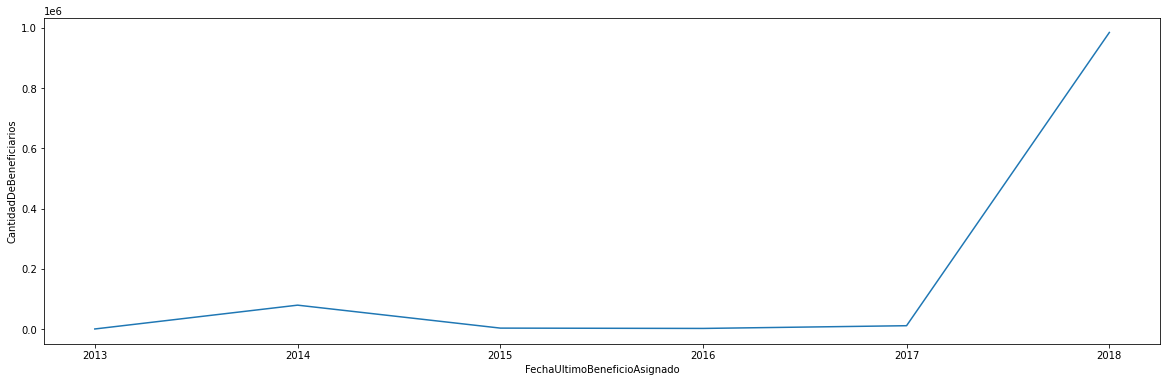

In [ ]:
fig, g = plt.subplots(figsize = (20,6))
d = data.groupby('FechaUltimoBeneficioAsignado').sum('CantidadDeBeneficiarios').reset_index()
g = sns.lineplot(x="FechaUltimoBeneficioAsignado", y="CantidadDeBeneficiarios", data=d, dashes=False, ax=g)

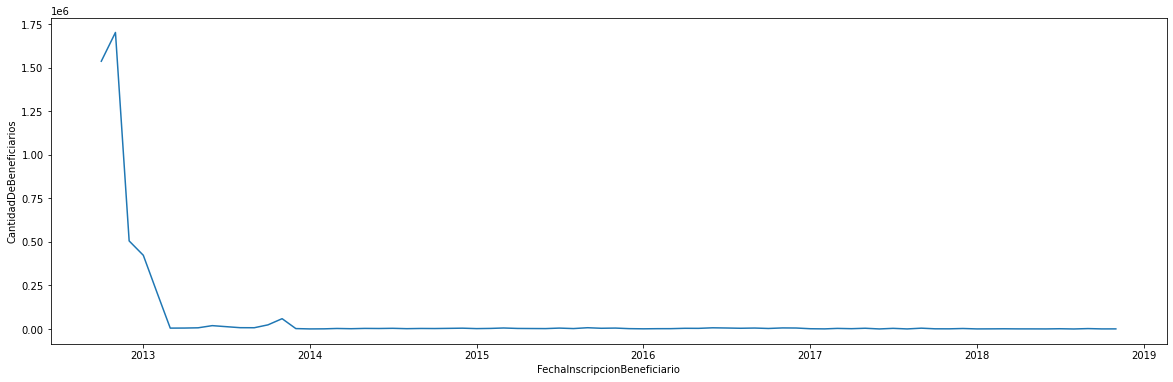

In [ ]:
fig, g = plt.subplots(figsize = (20,6))
d = data.groupby('FechaInscripcionBeneficiario').sum('CantidadDeBeneficiarios').reset_index()
g = sns.lineplot(x="FechaInscripcionBeneficiario", y="CantidadDeBeneficiarios", data=d, dashes=False, ax=g)


In [ ]:
CrosstabResult=pd.crosstab(index=data['NivelEscolaridad'],columns=data['TipoBeneficio'],values=data["CantidadDeBeneficiarios"],aggfunc=sum)
#print(CrosstabResult)
#from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
#ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
#print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
CrosstabResult

TipoBeneficio     EDUCACIÓN PRIMARIA  EDUCACIÓN PRIMARIANUTRICIÓN MENOR  \
NivelEscolaridad                                                          
PRIMARIA                   1160592.0                             6854.0   
SECUNDARIA                   24429.0                                NaN   
TECNICO                          NaN                                NaN   
TECNOLOGO                        NaN                                NaN   
TRANSICION                     204.0                                NaN   

TipoBeneficio     EDUCACIÓN SECUNDARIA  EDUCACIÓN SECUNDARIANUTRICIÓN  \
NivelEscolaridad                                                        
PRIMARIA                        1535.0                            NaN   
SECUNDARIA                   3211699.0                           29.0   
TECNICO                            2.0                            NaN   
TECNOLOGO                          NaN                            NaN   
TRANSICION                         NaN                            NaN   

TipoBeneficio     NUTRICIÓN  NUTRICIÓN MENOR  TRANSICIÓN  \
NivelEscolaridad                                           
PRIMARIA                6.0         112073.0       367.0   
SECUNDARIA         119759.0           6070.0         NaN   
TECNICO                 NaN              NaN         NaN   
TECNOLOGO               1.0              NaN         NaN   
TRANSICION              NaN            263.0     23624.0   

TipoBeneficio     TRANSICIÓNNUTRICIÓN MENOR  
NivelEscolaridad                             
PRIMARIA                             1999.0  
SECUNDARIA                              1.0  
TECNICO                                 NaN  
TECNOLOGO                               NaN  
TRANSICION                          24920.0

In [ ]:
relGenero = data.groupby('Genero').size() / data.shape[0] 
relEscola = data.groupby('NivelEscolaridad').size() / data.shape[0] 
relBancar = data.groupby('Bancarizado').size() / data.shape[0] 
relDiscap = data.groupby('Discapacidad').size() / data.shape[0] 
relEstado = data.groupby('EstadoBeneficiario').size() / data.shape[0] 
relEtnia = data.groupby('Etnia').size() / data.shape[0] 
relDepart = data.groupby('DepartamentoAtencion').size() / data.shape[0] 
relTipBen = data.groupby('TipoBeneficio').size() / data.shape[0] 
relTipDoc = data.groupby('TipoDocumento').size() / data.shape[0] 
relTipPob = data.groupby('TipoPoblacion').size() / data.shape[0] 
relRanCon = data.groupby('RangoBeneficioConsolidadoAsignado').size() / data.shape[0] 
relRanEdad = data.groupby('RangoEdad').size() / data.shape[0] 
relTitular = data.groupby('Titular').size() / data.shape[0] 

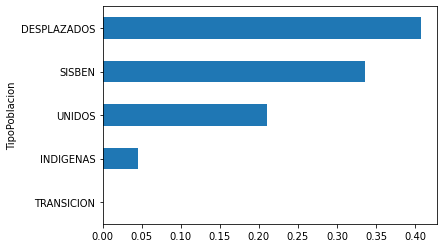

In [ ]:
relTipPob.sort_values().plot.barh()

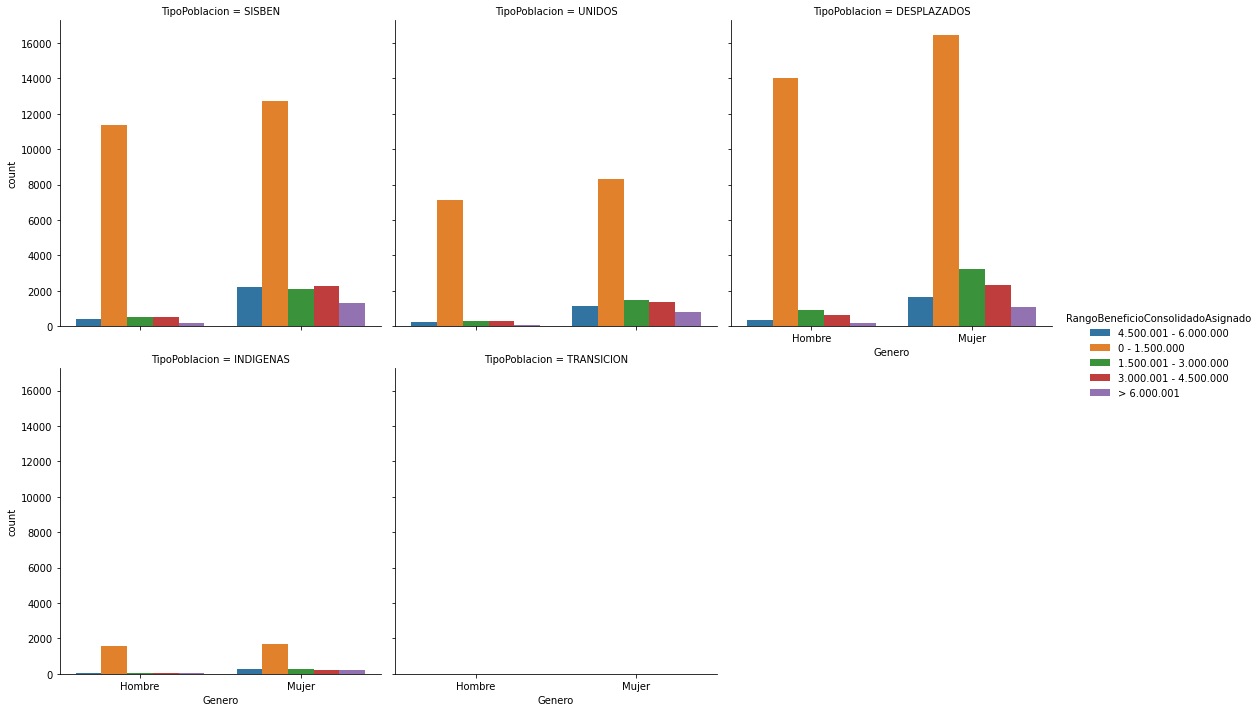

In [ ]:
g = sns.catplot(x="Genero", hue="RangoBeneficioConsolidadoAsignado", col="TipoPoblacion",
                data=data, kind="count", col_wrap=3);

In [ ]:
df2 = pd.pivot_table(data,index='TipoBeneficio',columns='RangoEdad',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df2

RangoEdad                           00-05      06-17      18-29     30-49  \
TipoBeneficio                                                               
EDUCACIÓN PRIMARIA                    NaN  1153458.0    31763.0       4.0   
EDUCACIÓN PRIMARIANUTRICIÓN MENOR     NaN     6854.0        NaN       NaN   
EDUCACIÓN SECUNDARIA               3731.0   278226.0  1973559.0  668483.0   
EDUCACIÓN SECUNDARIANUTRICIÓN         NaN        NaN       29.0       NaN   
NUTRICIÓN                             1.0        5.0     9763.0  106635.0   
NUTRICIÓN MENOR                    6069.0   112336.0        1.0       NaN   
TRANSICIÓN                            NaN    23991.0        NaN       NaN   
TRANSICIÓNNUTRICIÓN MENOR             NaN    26919.0        NaN       1.0   

RangoEdad                             50-65      >65  
TipoBeneficio                                         
EDUCACIÓN PRIMARIA                      NaN      NaN  
EDUCACIÓN PRIMARIANUTRICIÓN MENOR       NaN      NaN  
EDUCACIÓN SECUNDARIA               267020.0  22217.0  
EDUCACIÓN SECUNDARIANUTRICIÓN           NaN      NaN  
NUTRICIÓN                            3202.0    160.0  
NUTRICIÓN MENOR                         NaN      NaN  
TRANSICIÓN                              NaN      NaN  
TRANSICIÓNNUTRICIÓN MENOR               NaN      NaN

In [ ]:
df = pd.pivot_table(data,index='TipoBeneficio',columns='Genero',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df

Genero                                Hombre      Mujer
TipoBeneficio                                          
EDUCACIÓN PRIMARIA                  616904.0   568321.0
EDUCACIÓN PRIMARIANUTRICIÓN MENOR     3311.0     3543.0
EDUCACIÓN SECUNDARIA               1139281.0  2073955.0
EDUCACIÓN SECUNDARIANUTRICIÓN            NaN       29.0
NUTRICIÓN                             7875.0   111891.0
NUTRICIÓN MENOR                      60867.0    57539.0
TRANSICIÓN                           13493.0    10498.0
TRANSICIÓNNUTRICIÓN MENOR            14171.0    12749.0

In [ ]:
df = pd.pivot_table(data,index='RangoEdad',columns='NivelEscolaridad',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df

NivelEscolaridad   PRIMARIA  SECUNDARIA  TECNICO  TECNOLOGO  TRANSICION
RangoEdad                                                              
00-05                   NaN      9801.0      NaN        NaN         NaN
06-17             1272731.0    280047.0      NaN        NaN     49011.0
18-29               10691.0   2004422.0      2.0        NaN         NaN
30-49                   2.0    775120.0      NaN        1.0         NaN
50-65                   1.0    270221.0      NaN        NaN         NaN
>65                     1.0     22376.0      NaN        NaN         NaN

In [ ]:
data.groupby('DepartamentoAtencion').sum('CantidadDeBeneficiarios').reset_index()[['DepartamentoAtencion','CantidadDeBeneficiarios']].sort_values(by='CantidadDeBeneficiarios')

DepartamentoAtencion  CantidadDeBeneficiarios
31              97 - VAUPES                    782.0
32             99 - VICHADA                   1110.0
29             94 - GUAINIA                   2682.0
27          88 - SAN ANDRES                   3765.0
28            91 - AMAZONAS                   9658.0
30            95 - GUAVIARE                  11708.0
17             63 - QUINDIO                  29314.0
24              81 - ARAUCA                  40205.0
26            86 - PUTUMAYO                  47860.0
25            85 - CASANARE                  48053.0
9                27 - CHOCO                  52593.0
3               17 - CALDAS                  61254.0
18           66 - RISARALDA                  67411.0
4              18 - CAQUETA                  69803.0
2               15 - BOYACA                  81869.0
14                50 - META                 104051.0
8         25 - CUNDINAMARCA                 119187.0
11          44 - LA GUAJIRA                 133528.0
20               70 - SUCRE                 152027.0
19           68 - SANTANDER                 153821.0
21              73 - TOLIMA                 161431.0
10               41 - HUILA                 164591.0
6                20 - CESAR                 171337.0
16  54 - NORTE DE SANTANDER                 195351.0
5                19 - CAUCA                 218556.0
15              52 - NARIÑO                 249329.0
12           47 - MAGDALENA                 253295.0
0               11 - BOGOTA                 259514.0
23            8 - ATLANTICO                 267132.0
22               76 - VALLE                 311021.0
1              13 - BOLIVAR                 369298.0
7              23 - CORDOBA                 373386.0
13            5 - ANTIOQUIA                 509505.0

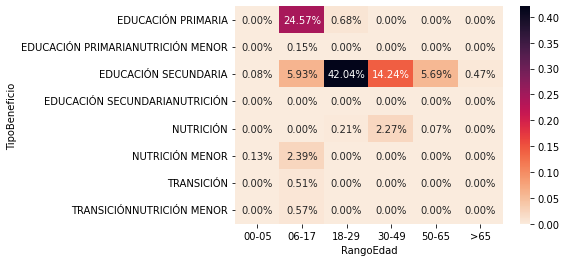

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['RangoEdad'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

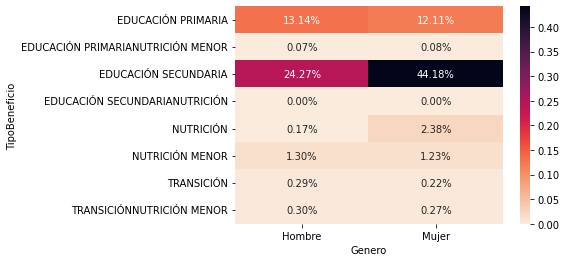

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['Genero'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

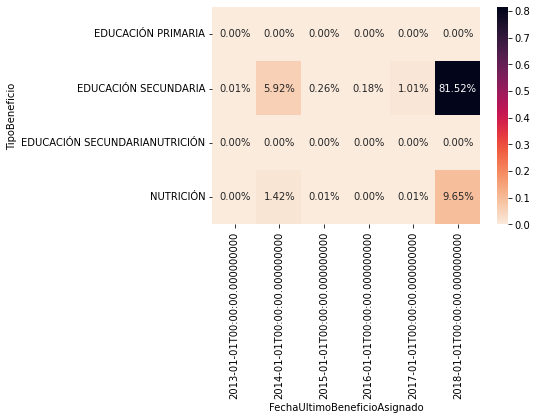

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['FechaUltimoBeneficioAsignado'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

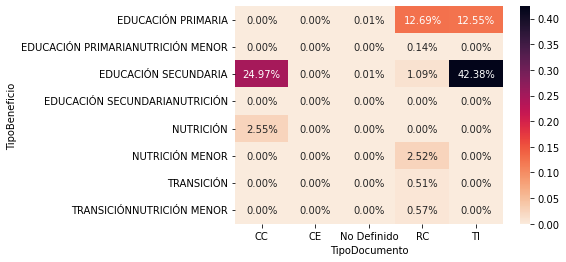

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['TipoDocumento'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

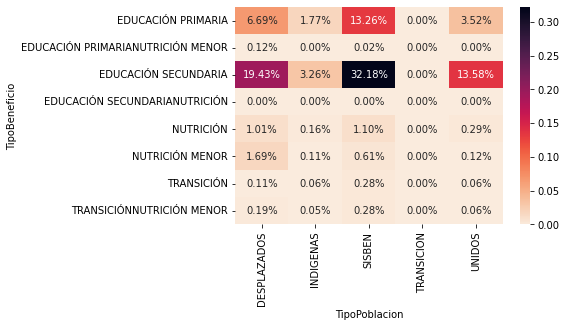

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['TipoPoblacion'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

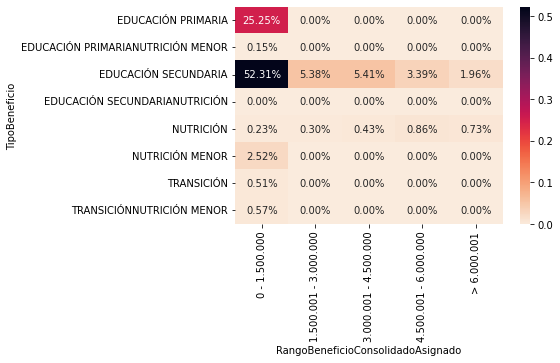

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['RangoBeneficioConsolidadoAsignado'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

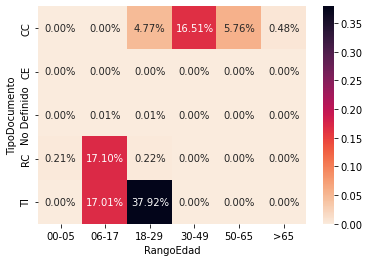

In [ ]:
cr=pd.crosstab(index=data['TipoDocumento'],columns=data['RangoEdad'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

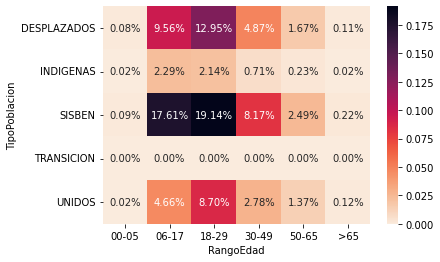

In [ ]:
cr=pd.crosstab(index=data['TipoPoblacion'],columns=data['RangoEdad'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

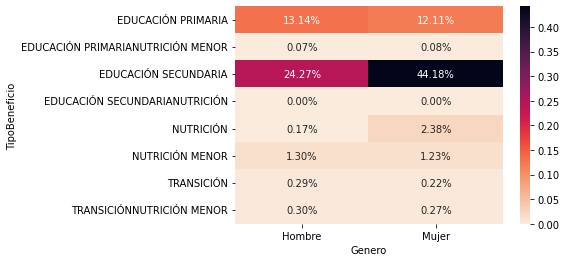

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['Genero'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

In [ ]:
df2 = pd.pivot_table(data,index='TipoBeneficio',columns='RangoEdad',values="CantidadDeBeneficiarios",aggfunc=np.sum)

print(df2)

RangoEdad                           00-05      06-17      18-29     30-49  \
TipoBeneficio                                                               
EDUCACIÓN PRIMARIA                    NaN  1153458.0    31763.0       4.0   
EDUCACIÓN PRIMARIANUTRICIÓN MENOR     NaN     6854.0        NaN       NaN   
EDUCACIÓN SECUNDARIA               3731.0   278226.0  1973559.0  668483.0   
EDUCACIÓN SECUNDARIANUTRICIÓN         NaN        NaN       29.0       NaN   
NUTRICIÓN                             1.0        5.0     9763.0  106635.0   
NUTRICIÓN MENOR                    6069.0   112336.0        1.0       NaN   
TRANSICIÓN                            NaN    23991.0        NaN       NaN   
TRANSICIÓNNUTRICIÓN MENOR             NaN    26919.0        NaN       1.0   

RangoEdad                             50-65      >65  
TipoBeneficio                                         
EDUCACIÓN PRIMARIA                      NaN      NaN  
EDUCACIÓN PRIMARIANUTRICIÓN MENOR       NaN      NaN  
EDUCACIÓN

In [ ]:
df = pd.pivot_table(data,index='TipoPoblacion',columns='Genero',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df

Genero           Hombre      Mujer
TipoPoblacion                     
DESPLAZADOS    547126.0   825523.0
INDIGENAS      104034.0   149772.0
SISBEN         883692.0  1356362.0
TRANSICION          1.0        3.0
UNIDOS         321049.0   506865.0

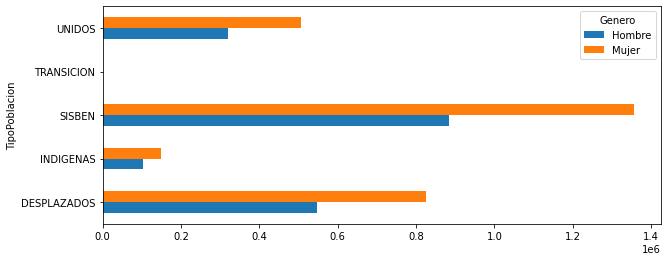

In [ ]:
df.plot.barh(figsize= (10,4))

In [ ]:
df2 = pd.pivot_table(data,index='TipoPoblacion',columns='NivelEscolaridad',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df2

NivelEscolaridad  PRIMARIA  SECUNDARIA  TECNICO  TECNOLOGO  TRANSICION
TipoPoblacion                                                         
DESPLAZADOS       376738.0    983659.0      1.0        NaN     12251.0
INDIGENAS          88066.0    160811.0      NaN        NaN      4929.0
SISBEN            648032.0   1565993.0      NaN        1.0     26028.0
TRANSICION             3.0         1.0      NaN        NaN         NaN
UNIDOS            170587.0    651523.0      1.0        NaN      5803.0

In [ ]:
d= data.groupby('NivelEscolaridad').sum('CantidadDeBeneficiarios').reset_index()
d[['NivelEscolaridad','CantidadDeBeneficiarios']].sort_values(by='CantidadDeBeneficiarios',ascending=False)


NivelEscolaridad  CantidadDeBeneficiarios
1       SECUNDARIA                3361987.0
0         PRIMARIA                1283426.0
4       TRANSICION                  49011.0
2          TECNICO                      2.0
3        TECNOLOGO                      1.0

In [ ]:
d= data.groupby('Etnia').sum('CantidadDeBeneficiarios').reset_index()
d[['Etnia','CantidadDeBeneficiarios']].sort_values(by='CantidadDeBeneficiarios',ascending=False)

Etnia  CantidadDeBeneficiarios
3         NINGUNA                4294016.0
1        INDIGENA                 267340.0
0  AFROCOLOMBIANO                 129818.0
2         MESTIZO                   2443.0
5          RAIZAL                    343.0
6             ROM                    242.0
4      PALENQUERO                    225.0

In [ ]:
data.columns

Index(['Bancarizado', 'Discapacidad', 'EstadoBeneficiario', 'Etnia',
       'FechaInscripcionBeneficiario', 'Genero', 'NivelEscolaridad',
       'TipoBeneficio', 'TipoDocumento', 'TipoPoblacion',
       'RangoBeneficioConsolidadoAsignado', 'RangoUltimoBeneficioAsignado',
       'FechaUltimoBeneficioAsignado', 'RangoEdad', 'Titular',
       'CantidadDeBeneficiarios', 'IDH', 'rango_idh', 'DepartamentoAtencion',
       'MunicipioAtencion'],
      dtype='object')

In [ ]:
print(len(data),np.sum(data.CantidadDeBeneficiarios))

100000 4694427.0


Sampleo manejo de datos

Seleccion de columnas para el modelo.

data2=data[['Bancarizado', 'Discapacidad', 'EstadoBeneficiario','Etnia',
'NivelEscolaridad','Genero','TipoBeneficio', 'TipoPoblacion','RangoBeneficioConsolidadoAsignado',
'Titular','rango_idh','RangoEdad','DepartamentoAtencion','CantidadDeBeneficiarios']]

In [ ]:
data2=data[[ 'EstadoBeneficiario','Etnia',
'NivelEscolaridad','Genero','TipoBeneficio', 'TipoPoblacion','RangoBeneficioConsolidadoAsignado',
'Titular','rango_idh','RangoEdad','CantidadDeBeneficiarios']]
data2 = data2.sample(frac=0.1, weights='CantidadDeBeneficiarios', random_state=1)
data_mod = data2.drop(columns='CantidadDeBeneficiarios').reset_index().drop(columns='index')

In [ ]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   EstadoBeneficiario                 10000 non-null  object  
 1   Etnia                              10000 non-null  object  
 2   NivelEscolaridad                   10000 non-null  object  
 3   Genero                             10000 non-null  object  
 4   TipoBeneficio                      10000 non-null  object  
 5   TipoPoblacion                      10000 non-null  object  
 6   RangoBeneficioConsolidadoAsignado  10000 non-null  object  
 7   Titular                            10000 non-null  object  
 8   rango_idh                          10000 non-null  category
 9   RangoEdad                          10000 non-null  object  
dtypes: category(1), object(9)
memory usage: 713.2+ KB


In [ ]:
d= data2.groupby('Etnia').sum('CantidadDeBeneficiarios').reset_index()
d[['Etnia','CantidadDeBeneficiarios']]


Etnia  CantidadDeBeneficiarios
0  AFROCOLOMBIANO                  42568.0
1        INDIGENA                 142040.0
2         MESTIZO                    150.0
3         NINGUNA                2328142.0
4      PALENQUERO                      6.0
5          RAIZAL                     81.0

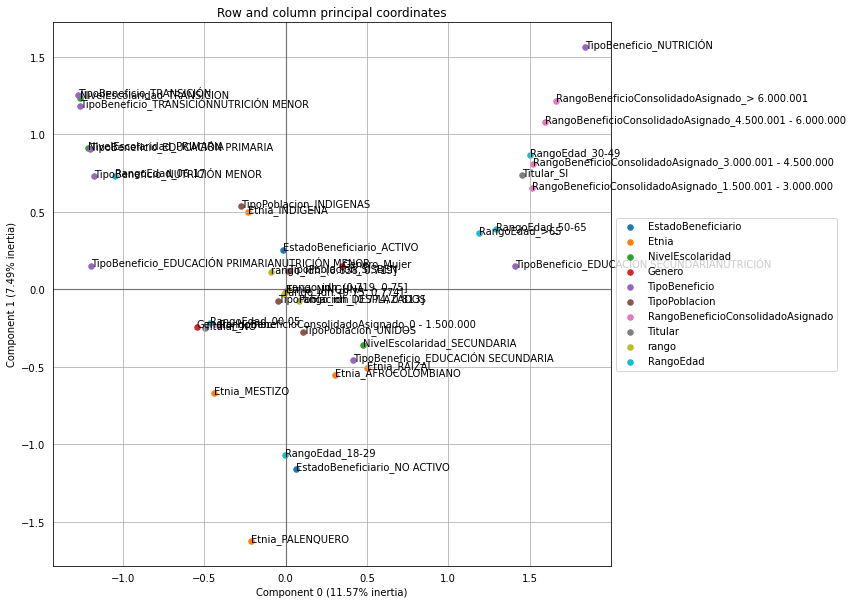

In [ ]:
mca = prince.MCA()        
churn_mca = mca.fit(data_mod)

ax = churn_mca.plot_coordinates(
        X=data_mod,
        ax=None,
        figsize=(10, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
X = OneHotEncoder().fit_transform(data_mod).toarray()
X  = pd.get_dummies(data_mod)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 35581.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 581, cost: 27840.0
Run 1, iteration: 2/100, moves: 309, cost: 27772.0
Run 1, iteration: 3/100, moves: 66, cost: 27772.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1208, cost: 23942.0
Run 1, iteration: 2/100, moves: 281, cost: 23867.0
Run 1, iteration: 3/100, moves: 39, cost: 23867.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10

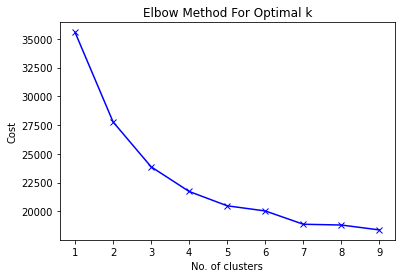

In [ ]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=1)
    kmode.fit_predict(data_mod)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
for x in range (2,6):
  kmode = KModes(n_clusters=x, init = "Cao", n_init = 5, verbose=1)
  label=kmode.fit_predict(data_mod)
  print('\n Para cluster:',x)
  print(f"Silhouette Score: {silhouette_score(X, label)}" )
  print(f"davies_bouldin score Score: {davies_bouldin_score(X, label)}")	

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 581, cost: 27840.0
Run 1, iteration: 2/100, moves: 309, cost: 27772.0
Run 1, iteration: 3/100, moves: 66, cost: 27772.0

 Para cluster: 2
Silhouette Score: 0.2305668072606547
davies_bouldin score Score: 1.5582909170677632
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1208, cost: 23942.0
Run 1, iteration: 2/100, moves: 281, cost: 23867.0
Run 1, iteration: 3/100, moves: 39, cost: 23867.0

 Para cluster: 3
Silhouette Score: 0.23129655650352293
davies_bouldin score Score: 1.7281196306993467
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10

In [ ]:
kmode = KModes(n_clusters=3, init = "Cao", n_init = 5, verbose=1)
clusters_kmode = kmode.fit_predict(data_mod)
labels = pd.DataFrame(clusters_kmode)
data_km = pd.concat((data_mod,labels),axis=1)
data_km = data_km.rename({0:'labels'},axis=1)
data_km_cla = pd.concat((data_mod,labels),axis=1)
data_km_cla = data_km_cla.rename({0:'labels'},axis=1)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1208, cost: 23942.0
Run 1, iteration: 2/100, moves: 281, cost: 23867.0
Run 1, iteration: 3/100, moves: 39, cost: 23867.0


In [ ]:
data_km

EstadoBeneficiario     Etnia NivelEscolaridad  Genero  \
0                ACTIVO   NINGUNA       SECUNDARIA  Hombre   
1             NO ACTIVO   NINGUNA       SECUNDARIA   Mujer   
2                ACTIVO   NINGUNA       SECUNDARIA  Hombre   
3                ACTIVO  INDIGENA       SECUNDARIA  Hombre   
4                ACTIVO   NINGUNA       SECUNDARIA   Mujer   
...                 ...       ...              ...     ...   
9995             ACTIVO  INDIGENA       SECUNDARIA  Hombre   
9996             ACTIVO   NINGUNA       SECUNDARIA   Mujer   
9997             ACTIVO   NINGUNA         PRIMARIA  Hombre   
9998             ACTIVO   NINGUNA       SECUNDARIA   Mujer   
9999             ACTIVO  INDIGENA         PRIMARIA  Hombre   

             TipoBeneficio TipoPoblacion RangoBeneficioConsolidadoAsignado  \
0     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
1     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
2     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
3     EDUCACIÓN SECUNDARIA     INDIGENAS                     0 - 1.500.000   
4     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
...                    ...           ...                               ...   
9995  EDUCACIÓN SECUNDARIA     INDIGENAS                     0 - 1.500.000   
9996  EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
9997    EDUCACIÓN PRIMARIA        SISBEN                     0 - 1.500.000   
9998  EDUCACIÓN SECUNDARIA   DESPLAZADOS             4.500.001 - 6.000.000   
9999    EDUCACIÓN PRIMARIA     INDIGENAS                     0 - 1.500.000   

     Titular       rango_idh RangoEdad  labels  
0         NO   (0.719, 0.75]     18-29       0  
1         NO  (0.774, 0.813]     18-29       0  
2         NO   (0.719, 0.75]     18-29       0  
3         NO  (0.638, 0.719]     18-29       0  
4         NO  (0.774, 0.813]     18-29       0  
...      ...             ...       ...     ...  
9995      NO   (0.719, 0.75]     06-17       0  
9996      NO   (0.75, 0.774]     18-29       0  
9997      NO   (0.75, 0.774]     06-17       1  
9998      SI   (0.75, 0.774]     18-29       2  
9999      NO   (0.719, 0.75]     06-17       1  

[10000 rows x 11 columns]

#REGLAS KMODES

Evaluacion, usando one hot encoder para distancias internas

In [ ]:
for x in data_km.columns:
  data_km[x] = data_km[x].astype(str).apply(lambda y: x+'_'+y)

In [ ]:
aso_0 = data_km[data_km['labels']=='labels_0'].drop(columns='labels').values.tolist()
aso_1 = data_km[data_km['labels']=='labels_1'].drop(columns='labels').values.tolist()
aso_2 = data_km[data_km['labels']=='labels_2'].drop(columns='labels').values.tolist()


In [ ]:
itemsets, rules = apriori(aso_0, min_support=0.6,  min_confidence=1)
for rule in sorted(rules, key=lambda rule: rule.lift):
  print(rule)

{Etnia_NINGUNA, NivelEscolaridad_SECUNDARIA, RangoEdad_18-29, TipoBeneficio_EDUCACIÓN SECUNDARIA, Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.636, lift: 1.085, conv: 78162622.708)
{RangoEdad_18-29, Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.724, lift: 1.085, conv: 78162622.708)
{Etnia_NINGUNA, RangoEdad_18-29, Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.645, lift: 1.085, conv: 78162622.708)
{NivelEscolaridad_SECUNDARIA, RangoEdad_18-29, Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.722, lift: 1.085, conv: 78162622.708)
{RangoEdad_18-29, TipoBeneficio_EDUCACIÓN SECUNDARIA, Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.715, lift: 1.085, conv: 78162622.708)
{Etnia_NINGUNA, NivelEscolaridad_SECUNDARIA, RangoEdad_18-29, Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000

In [ ]:
itemsets, rules = apriori(aso_1, min_support=0.95,  min_confidence=1)
for rule in sorted(rules, key=lambda rule: rule.lift):
  print(rule)

{EstadoBeneficiario_ACTIVO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.953, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO} -> {Titular_NO} (conf: 1.000, supp: 0.953, lift: 1.000, conv: 0.000)
{NivelEscolaridad_PRIMARIA} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.968, lift: 1.000, conv: 0.000)
{NivelEscolaridad_PRIMARIA} -> {Titular_NO} (conf: 1.000, supp: 0.968, lift: 1.000, conv: 0.000)
{RangoEdad_06-17} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.991, lift: 1.000, conv: 0.000)
{Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{RangoBeneficioConsolidadoAsignado_0 - 1.500.000} -> {Titular_NO} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{RangoEdad_06-17} -> {Titular_NO} (conf: 1.000, supp: 0.991, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO, Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.0

In [ ]:
itemsets, rules = apriori(aso_2, min_support=0.8,  min_confidence=1)
for rule in sorted(rules, key=lambda rule: rule.lift):
  print(rule)

{EstadoBeneficiario_ACTIVO} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.907, lift: 1.000, conv: 0.000)
{Etnia_NINGUNA} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.894, lift: 1.000, conv: 0.000)
{Genero_Mujer} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.923, lift: 1.000, conv: 0.000)
{TipoBeneficio_EDUCACIÓN SECUNDARIA} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.856, lift: 1.000, conv: 0.000)
{Titular_SI} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.999, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO, Etnia_NINGUNA} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.801, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO, Genero_Mujer} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.838, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO, Titular_SI} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.907, lift: 1.000, conv: 0.000)
{Etnia_NINGUNA, Genero_Mujer} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, s

In [ ]:
print(len(aso_0),len(aso_1),len(aso_2))

5399 2717 1884


In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(aso_0, 3000)
rules = pyfpgrowth.generate_association_rules(patterns, 1)
for x in rules:
  print(x)

('Etnia_NINGUNA', 'RangoEdad_18-29', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_NO')
('Etnia_NINGUNA', 'NivelEscolaridad_SECUNDARIA', 'RangoEdad_18-29', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_NO')
('Etnia_NINGUNA', 'NivelEscolaridad_SECUNDARIA', 'RangoEdad_18-29', 'Titular_NO')
('RangoEdad_18-29', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_NO')
('NivelEscolaridad_SECUNDARIA', 'RangoEdad_18-29', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_NO')
('NivelEscolaridad_SECUNDARIA', 'RangoEdad_18-29', 'Titular_NO')


In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(aso_1, 2000)
rules = pyfpgrowth.generate_association_rules(patterns, 1)
for x in rules:
  print(x)

('EstadoBeneficiario_ACTIVO', 'Etnia_NINGUNA', 'RangoEdad_06-17', 'TipoBeneficio_EDUCACIÓN PRIMARIA')
('EstadoBeneficiario_ACTIVO', 'Etnia_NINGUNA', 'NivelEscolaridad_PRIMARIA', 'RangoEdad_06-17', 'TipoBeneficio_EDUCACIÓN PRIMARIA')
('EstadoBeneficiario_ACTIVO', 'Etnia_NINGUNA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000', 'RangoEdad_06-17', 'TipoBeneficio_EDUCACIÓN PRIMARIA')
('EstadoBeneficiario_ACTIVO', 'Etnia_NINGUNA', 'RangoEdad_06-17', 'TipoBeneficio_EDUCACIÓN PRIMARIA', 'Titular_NO')
('EstadoBeneficiario_ACTIVO', 'Etnia_NINGUNA', 'NivelEscolaridad_PRIMARIA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000', 'RangoEdad_06-17', 'TipoBeneficio_EDUCACIÓN PRIMARIA')
('EstadoBeneficiario_ACTIVO', 'Etnia_NINGUNA', 'NivelEscolaridad_PRIMARIA', 'RangoEdad_06-17', 'TipoBeneficio_EDUCACIÓN PRIMARIA', 'Titular_NO')
('EstadoBeneficiario_ACTIVO', 'Etnia_NINGUNA', 'NivelEscolaridad_PRIMARIA', 'TipoBeneficio_EDUCACIÓN PRIMARIA')
('EstadoBeneficiario_ACTIVO', 'Etnia_NINGUNA', 'NivelEscola

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(aso_2, 1500)
rules = pyfpgrowth.generate_association_rules(patterns, 1)
for x in rules:
  print(x)

('TipoBeneficio_EDUCACIÓN SECUNDARIA',)
('TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_SI')
('EstadoBeneficiario_ACTIVO', 'Etnia_NINGUNA')
('EstadoBeneficiario_ACTIVO', 'Etnia_NINGUNA', 'Titular_SI')
('Etnia_NINGUNA', 'Genero_Mujer')
('Etnia_NINGUNA', 'Genero_Mujer', 'Titular_SI')
('Etnia_NINGUNA', 'Titular_SI')
('EstadoBeneficiario_ACTIVO', 'Genero_Mujer')
('EstadoBeneficiario_ACTIVO', 'Genero_Mujer', 'Titular_SI')
('EstadoBeneficiario_ACTIVO', 'Titular_SI')
('Genero_Mujer',)
('Genero_Mujer', 'Titular_SI')
('Titular_SI',)


KMEANS

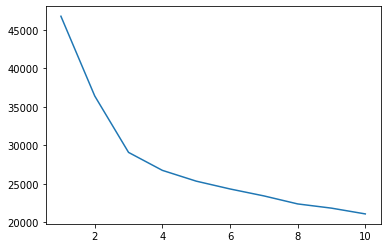

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(X)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

In [ ]:

kmeans = KMeans(3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)
labels = pd.DataFrame(clusters)
df_kmeans = pd.concat((data_mod,labels),axis=1)
df_kmeans = df_kmeans.rename({0:'labels'},axis=1)
df_kmeans

EstadoBeneficiario     Etnia NivelEscolaridad  Genero  \
0                ACTIVO   NINGUNA       SECUNDARIA  Hombre   
1             NO ACTIVO   NINGUNA       SECUNDARIA   Mujer   
2                ACTIVO   NINGUNA       SECUNDARIA  Hombre   
3                ACTIVO  INDIGENA       SECUNDARIA  Hombre   
4                ACTIVO   NINGUNA       SECUNDARIA   Mujer   
...                 ...       ...              ...     ...   
9995             ACTIVO  INDIGENA       SECUNDARIA  Hombre   
9996             ACTIVO   NINGUNA       SECUNDARIA   Mujer   
9997             ACTIVO   NINGUNA         PRIMARIA  Hombre   
9998             ACTIVO   NINGUNA       SECUNDARIA   Mujer   
9999             ACTIVO  INDIGENA         PRIMARIA  Hombre   

             TipoBeneficio TipoPoblacion RangoBeneficioConsolidadoAsignado  \
0     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
1     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
2     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
3     EDUCACIÓN SECUNDARIA     INDIGENAS                     0 - 1.500.000   
4     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
...                    ...           ...                               ...   
9995  EDUCACIÓN SECUNDARIA     INDIGENAS                     0 - 1.500.000   
9996  EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
9997    EDUCACIÓN PRIMARIA        SISBEN                     0 - 1.500.000   
9998  EDUCACIÓN SECUNDARIA   DESPLAZADOS             4.500.001 - 6.000.000   
9999    EDUCACIÓN PRIMARIA     INDIGENAS                     0 - 1.500.000   

     Titular       rango_idh RangoEdad  labels  
0         NO   (0.719, 0.75]     18-29       2  
1         NO  (0.774, 0.813]     18-29       2  
2         NO   (0.719, 0.75]     18-29       2  
3         NO  (0.638, 0.719]     18-29       2  
4         NO  (0.774, 0.813]     18-29       2  
...      ...             ...       ...     ...  
9995      NO   (0.719, 0.75]     06-17       2  
9996      NO   (0.75, 0.774]     18-29       2  
9997      NO   (0.75, 0.774]     06-17       1  
9998      SI   (0.75, 0.774]     18-29       0  
9999      NO   (0.719, 0.75]     06-17       1  

[10000 rows x 11 columns]

In [ ]:
print(f"Silhouette Score: {silhouette_score(X, labels)}" )
print(f"davies_bouldin score Score: {davies_bouldin_score(X, labels)}")	

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.2670070729715059
davies_bouldin score Score: 1.5771559415409004


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#REGLAS KMEANS

In [ ]:
for x in df_kmeans.columns:
  df_kmeans[x] = df_kmeans[x].astype(str).apply(lambda y: x+'_'+y)

In [ ]:
aso_0 = data_km[df_kmeans['labels']=='labels_0'].drop(columns='labels').values.tolist()
aso_1 = data_km[df_kmeans['labels']=='labels_1'].drop(columns='labels').values.tolist()
aso_2 = data_km[df_kmeans['labels']=='labels_2'].drop(columns='labels').values.tolist()

In [ ]:
itemsets, rules = apriori(aso_0, min_support=0.7,  min_confidence=1)
for rule in sorted(rules, key=lambda rule: rule.lift):
  print(rule)

{EstadoBeneficiario_ACTIVO} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.914, lift: 1.000, conv: 0.000)
{Etnia_NINGUNA} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.911, lift: 1.000, conv: 0.000)
{Genero_Mujer} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.926, lift: 1.000, conv: 0.000)
{TipoBeneficio_EDUCACIÓN SECUNDARIA} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.864, lift: 1.000, conv: 0.000)
{Titular_SI} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO, Etnia_NINGUNA} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.826, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO, Genero_Mujer} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.845, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO, TipoBeneficio_EDUCACIÓN SECUNDARIA} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.793, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO, Titular_SI} -> {NivelEscol

In [ ]:
itemsets, rules = apriori(aso_1, min_support=0.9,  min_confidence=1)
for rule in sorted(rules, key=lambda rule: rule.lift):
  print(rule)

{EstadoBeneficiario_ACTIVO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.954, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO} -> {Titular_NO} (conf: 1.000, supp: 0.954, lift: 1.000, conv: 0.000)
{Etnia_NINGUNA} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.916, lift: 1.000, conv: 0.000)
{Etnia_NINGUNA} -> {Titular_NO} (conf: 1.000, supp: 0.916, lift: 1.000, conv: 0.000)
{NivelEscolaridad_PRIMARIA} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.942, lift: 1.000, conv: 0.000)
{NivelEscolaridad_PRIMARIA} -> {Titular_NO} (conf: 1.000, supp: 0.942, lift: 1.000, conv: 0.000)
{RangoEdad_06-17} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.989, lift: 1.000, conv: 0.000)
{Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{RangoBeneficioConsolidadoAsignado_0 - 1.500.000} -> {Titular_NO} (conf: 1.000, supp: 1.

In [ ]:
itemsets, rules = apriori(aso_2, min_support=0.7,  min_confidence=1)
for rule in sorted(rules, key=lambda rule: rule.lift):
  print(rule)

{Etnia_NINGUNA, RangoEdad_18-29} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.748, lift: 1.000, conv: 214592.275)
{RangoEdad_18-29, TipoBeneficio_EDUCACIÓN SECUNDARIA} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.830, lift: 1.000, conv: 214592.275)
{RangoEdad_18-29, Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.838, lift: 1.000, conv: 214592.275)
{Etnia_NINGUNA, RangoEdad_18-29, TipoBeneficio_EDUCACIÓN SECUNDARIA} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.739, lift: 1.000, conv: 214592.275)
{Etnia_NINGUNA, RangoEdad_18-29, Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.747, lift: 1.000, conv: 214592.275)
{RangoEdad_18-29, TipoBeneficio_EDUCACIÓN SECUNDARIA, Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.829, lift: 1.000, conv: 214592.275)
{RangoEdad_18-29} -> {RangoBeneficioC

In [ ]:
print(len(aso_0),len(aso_1),len(aso_2))

2541 2799 4660


In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(aso_0, 2000)
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)
for x in rules:
  print(x)

('Titular_SI',)
('EstadoBeneficiario_ACTIVO', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('EstadoBeneficiario_ACTIVO', 'Titular_SI')
('TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_SI')
('NivelEscolaridad_SECUNDARIA',)
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_SECUNDARIA')
('NivelEscolaridad_SECUNDARIA', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('NivelEscolaridad_SECUNDARIA', 'Titular_SI')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_SECUNDARIA', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_SECUNDARIA', 'Titular_SI')
('EstadoBeneficiario_ACTIVO', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_SI')
('NivelEscolaridad_SECUNDARIA', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_SI')
('Genero_Mujer',)
('Genero_Mujer', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('Genero_Mujer', 'Titular_SI')
('Genero_Mujer', 'NivelEscolaridad_SECUNDARIA')
('Genero_Mujer', 'NivelEscolaridad_SECUNDARIA', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('Genero_Mujer', 'NivelEscolari

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(aso_1, 2500)
rules = pyfpgrowth.generate_association_rules(patterns, 1)
for x in rules:
  print(x)

('Etnia_NINGUNA',)
('Etnia_NINGUNA', 'RangoEdad_06-17')
('Etnia_NINGUNA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000')
('Etnia_NINGUNA', 'Titular_NO')
('Etnia_NINGUNA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000', 'RangoEdad_06-17')
('Etnia_NINGUNA', 'RangoEdad_06-17', 'Titular_NO')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_PRIMARIA')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_PRIMARIA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_PRIMARIA', 'Titular_NO')
('NivelEscolaridad_PRIMARIA', 'RangoEdad_06-17')
('NivelEscolaridad_PRIMARIA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000', 'RangoEdad_06-17')
('NivelEscolaridad_PRIMARIA', 'RangoEdad_06-17', 'Titular_NO')
('NivelEscolaridad_PRIMARIA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000')
('NivelEscolaridad_PRIMARIA', 'Titular_NO')
('EstadoBeneficiario_ACTIVO',)
('EstadoBeneficiario_ACTIVO', 'RangoEdad_06-17')
('EstadoBeneficiario_ACTIVO', 'RangoBeneficio

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(aso_2, 2000)
rules = pyfpgrowth.generate_association_rules(patterns, 1)
for x in rules:
  print(x)

('Genero_Mujer', 'RangoEdad_18-29', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_NO')
('Genero_Mujer', 'NivelEscolaridad_SECUNDARIA', 'RangoEdad_18-29', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_NO')
('Genero_Mujer', 'NivelEscolaridad_SECUNDARIA', 'RangoEdad_18-29', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('Genero_Mujer', 'RangoEdad_18-29', 'Titular_NO')
('Genero_Mujer', 'NivelEscolaridad_SECUNDARIA', 'RangoEdad_18-29', 'Titular_NO')
('Genero_Mujer', 'NivelEscolaridad_SECUNDARIA', 'RangoEdad_18-29')
('Etnia_NINGUNA', 'Genero_Mujer', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_NO')
('Etnia_NINGUNA', 'Genero_Mujer', 'NivelEscolaridad_SECUNDARIA', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_NO')
('Etnia_NINGUNA', 'Genero_Mujer', 'NivelEscolaridad_SECUNDARIA', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('Etnia_NINGUNA', 'Genero_Mujer', 'Titular_NO')
('Etnia_NINGUNA', 'Genero_Mujer', 'NivelEscolaridad_SECUNDARIA', 'Titular_NO')
('Etnia_NINGUNA', 'Genero_Mujer', 'NivelEscolaridad_SECUN

GAUSSIAN MIXTURE

In [ ]:
model = GaussianMixture(n_components=3)

yhat = model.fit_predict(X)

In [ ]:
labels = pd.DataFrame(yhat)
df_Gau_mix = pd.concat((data_mod,labels),axis=1)
df_Gau_mix = df_Gau_mix.rename({0:'labels'},axis=1)
df_Gau_mix

EstadoBeneficiario     Etnia NivelEscolaridad  Genero  \
0                ACTIVO   NINGUNA       SECUNDARIA  Hombre   
1             NO ACTIVO   NINGUNA       SECUNDARIA   Mujer   
2                ACTIVO   NINGUNA       SECUNDARIA  Hombre   
3                ACTIVO  INDIGENA       SECUNDARIA  Hombre   
4                ACTIVO   NINGUNA       SECUNDARIA   Mujer   
...                 ...       ...              ...     ...   
9995             ACTIVO  INDIGENA       SECUNDARIA  Hombre   
9996             ACTIVO   NINGUNA       SECUNDARIA   Mujer   
9997             ACTIVO   NINGUNA         PRIMARIA  Hombre   
9998             ACTIVO   NINGUNA       SECUNDARIA   Mujer   
9999             ACTIVO  INDIGENA         PRIMARIA  Hombre   

             TipoBeneficio TipoPoblacion RangoBeneficioConsolidadoAsignado  \
0     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
1     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
2     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
3     EDUCACIÓN SECUNDARIA     INDIGENAS                     0 - 1.500.000   
4     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
...                    ...           ...                               ...   
9995  EDUCACIÓN SECUNDARIA     INDIGENAS                     0 - 1.500.000   
9996  EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
9997    EDUCACIÓN PRIMARIA        SISBEN                     0 - 1.500.000   
9998  EDUCACIÓN SECUNDARIA   DESPLAZADOS             4.500.001 - 6.000.000   
9999    EDUCACIÓN PRIMARIA     INDIGENAS                     0 - 1.500.000   

     Titular       rango_idh RangoEdad  labels  
0         NO   (0.719, 0.75]     18-29       2  
1         NO  (0.774, 0.813]     18-29       2  
2         NO   (0.719, 0.75]     18-29       2  
3         NO  (0.638, 0.719]     18-29       2  
4         NO  (0.774, 0.813]     18-29       2  
...      ...             ...       ...     ...  
9995      NO   (0.719, 0.75]     06-17       2  
9996      NO   (0.75, 0.774]     18-29       2  
9997      NO   (0.75, 0.774]     06-17       1  
9998      SI   (0.75, 0.774]     18-29       0  
9999      NO   (0.719, 0.75]     06-17       1  

[10000 rows x 11 columns]

#REGLAS GAUSSIAN_MIXTURE

In [ ]:
for x in df_Gau_mix.columns:
  df_Gau_mix[x] = df_Gau_mix[x].astype(str).apply(lambda y: x+'_'+y)

In [ ]:
aso_0 = df_Gau_mix[df_Gau_mix['labels']=='labels_0'].drop(columns='labels').values.tolist()
aso_1 = df_Gau_mix[df_Gau_mix['labels']=='labels_1'].drop(columns='labels').values.tolist()
aso_2 = df_Gau_mix[df_Gau_mix['labels']=='labels_2'].drop(columns='labels').values.tolist()

In [ ]:
itemsets, rules = apriori(aso_0, min_support=0.6,  min_confidence=1)
for rule in sorted(rules, key=lambda rule: rule.lift):
  print(rule)

{EstadoBeneficiario_ACTIVO} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.911, lift: 1.000, conv: 0.000)
{Etnia_NINGUNA} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.912, lift: 1.000, conv: 0.000)
{Genero_Mujer} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.922, lift: 1.000, conv: 0.000)
{RangoEdad_30-49} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.669, lift: 1.000, conv: 0.000)
{TipoBeneficio_EDUCACIÓN SECUNDARIA} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.864, lift: 1.000, conv: 0.000)
{Titular_SI} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.999, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO, Etnia_NINGUNA} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.823, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO, Genero_Mujer} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.841, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO, RangoEdad_30-49} -> {NivelEscolaridad_SECUNDARIA} (conf: 1.000, supp: 0.

In [ ]:
itemsets, rules = apriori(aso_1, min_support=0.9,  min_confidence=1)
for rule in sorted(rules, key=lambda rule: rule.lift):
  print(rule)

{EstadoBeneficiario_ACTIVO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.954, lift: 1.000, conv: 0.000)
{EstadoBeneficiario_ACTIVO} -> {Titular_NO} (conf: 1.000, supp: 0.954, lift: 1.000, conv: 0.000)
{Etnia_NINGUNA} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.916, lift: 1.000, conv: 0.000)
{Etnia_NINGUNA} -> {Titular_NO} (conf: 1.000, supp: 0.916, lift: 1.000, conv: 0.000)
{NivelEscolaridad_PRIMARIA} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.944, lift: 1.000, conv: 0.000)
{NivelEscolaridad_PRIMARIA} -> {Titular_NO} (conf: 1.000, supp: 0.944, lift: 1.000, conv: 0.000)
{RangoEdad_06-17} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.989, lift: 1.000, conv: 0.000)
{Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{RangoBeneficioConsolidadoAsignado_0 - 1.500.000} -> {Titular_NO} (conf: 1.000, supp: 1.

In [ ]:
itemsets, rules = apriori(aso_2, min_support=0.9,  min_confidence=1)
for rule in sorted(rules, key=lambda rule: rule.lift):
  print(rule)

{NivelEscolaridad_SECUNDARIA} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.998, lift: 1.000, conv: 0.000)
{NivelEscolaridad_SECUNDARIA} -> {Titular_NO} (conf: 1.000, supp: 0.998, lift: 1.000, conv: 0.000)
{TipoBeneficio_EDUCACIÓN SECUNDARIA} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.985, lift: 1.000, conv: 0.000)
{Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{RangoBeneficioConsolidadoAsignado_0 - 1.500.000} -> {Titular_NO} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{TipoBeneficio_EDUCACIÓN SECUNDARIA} -> {Titular_NO} (conf: 1.000, supp: 0.985, lift: 1.000, conv: 0.000)
{NivelEscolaridad_SECUNDARIA, TipoBeneficio_EDUCACIÓN SECUNDARIA} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.000, supp: 0.983, lift: 1.000, conv: 0.000)
{NivelEscolaridad_SECUNDARIA, Titular_NO} -> {RangoBeneficioConsolidadoAsignado_0 - 1.500.000} (conf: 1.00

In [ ]:
print(len(aso_0),len(aso_1),len(aso_2))

2553 2792 4655


In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(aso_0, 2000)
rules = pyfpgrowth.generate_association_rules(patterns, 1)
for x in rules:
  print(x)

('Etnia_NINGUNA', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('Etnia_NINGUNA', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_SI')
('EstadoBeneficiario_ACTIVO', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('EstadoBeneficiario_ACTIVO', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_SI')
('Genero_Mujer', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('Genero_Mujer', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_SI')
('TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_SI')
('EstadoBeneficiario_ACTIVO', 'Etnia_NINGUNA')
('EstadoBeneficiario_ACTIVO', 'Etnia_NINGUNA', 'Titular_SI')
('EstadoBeneficiario_ACTIVO', 'Genero_Mujer')
('EstadoBeneficiario_ACTIVO', 'Genero_Mujer', 'Titular_SI')
('EstadoBeneficiario_ACTIVO', 'Titular_SI')
('Etnia_NINGUNA', 'Genero_Mujer')
('Etnia_NINGUNA', 'Genero_Mujer', 'Titular_SI')
('Etnia_NINGUNA', 'Titular_SI')
('Genero_Mujer',)
('Genero_Mujer', 'Titular_SI')
('Titular_SI',)


In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(aso_1, 2500)
rules = pyfpgrowth.generate_association_rules(patterns, 1)
for x in rules:
  print(x)

('Etnia_NINGUNA',)
('Etnia_NINGUNA', 'RangoEdad_06-17')
('Etnia_NINGUNA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000')
('Etnia_NINGUNA', 'Titular_NO')
('Etnia_NINGUNA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000', 'RangoEdad_06-17')
('Etnia_NINGUNA', 'RangoEdad_06-17', 'Titular_NO')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_PRIMARIA')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_PRIMARIA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_PRIMARIA', 'Titular_NO')
('NivelEscolaridad_PRIMARIA', 'RangoEdad_06-17')
('NivelEscolaridad_PRIMARIA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000', 'RangoEdad_06-17')
('NivelEscolaridad_PRIMARIA', 'RangoEdad_06-17', 'Titular_NO')
('NivelEscolaridad_PRIMARIA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000')
('NivelEscolaridad_PRIMARIA', 'Titular_NO')
('EstadoBeneficiario_ACTIVO',)
('EstadoBeneficiario_ACTIVO', 'RangoEdad_06-17')
('EstadoBeneficiario_ACTIVO', 'RangoBeneficio

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(aso_2, 3000)
rules = pyfpgrowth.generate_association_rules(patterns, 1)
for x in rules:
  print(x)

('EstadoBeneficiario_ACTIVO', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_SECUNDARIA', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('EstadoBeneficiario_ACTIVO', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('EstadoBeneficiario_ACTIVO', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_NO')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_SECUNDARIA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000', 'TipoBeneficio_EDUCACIÓN SECUNDARIA')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_SECUNDARIA', 'TipoBeneficio_EDUCACIÓN SECUNDARIA', 'Titular_NO')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_SECUNDARIA')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_SECUNDARIA', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000')
('EstadoBeneficiario_ACTIVO', 'NivelEscolaridad_SECUNDARIA', 'Titular_NO')
('EstadoBeneficiario_ACTIVO', 'RangoBeneficioConsolidadoAsignado_0 - 1.500.000')
('EstadoBeneficiario_ACTIVO', 'Titular_N

In [ ]:
print(f"Silhouette Score: {silhouette_score(X, yhat)}" )
print(f"davies_bouldin score Score: {davies_bouldin_score(X, yhat)}")	

Silhouette Score: 0.26649320506087526
davies_bouldin score Score: 1.580158398860478


#PCA para  KMODES

In [ ]:
pca = PCA(n_components=2,random_state=42)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, pd.DataFrame(clusters_kmode)], axis = 1)

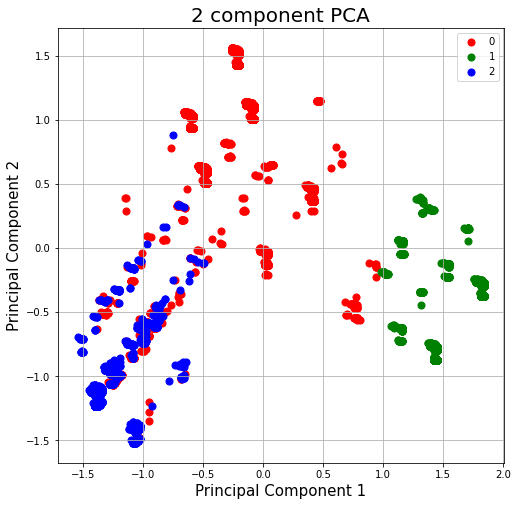

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#PCA PARA KMEANS

In [ ]:
dict_repl={0:2,2:0}
finalDf_kmenas = pd.concat([principalDf, pd.DataFrame(clusters)], axis = 1)
finalDf_kmenas = finalDf_kmenas.replace({0:dict_repl})

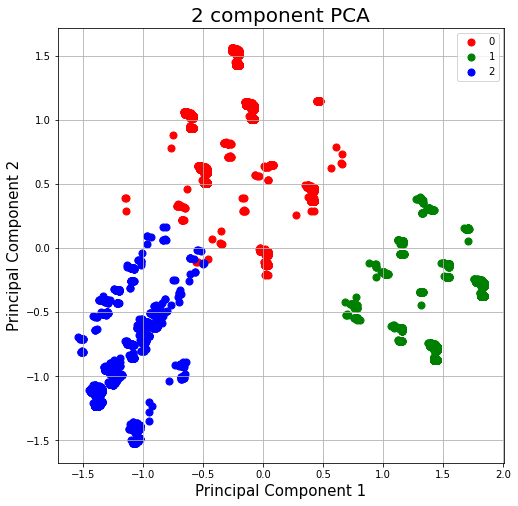

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_kmenas[0] == target
    ax.scatter(finalDf_kmenas.loc[indicesToKeep, 'principal component 1']
               , finalDf_kmenas.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#PCA para GaussianMixture

In [ ]:
#dict_repl={1:0,0:1}
finalDf = pd.concat([principalDf, pd.DataFrame(yhat)], axis = 1)
finalDf = finalDf.replace({0:dict_repl})

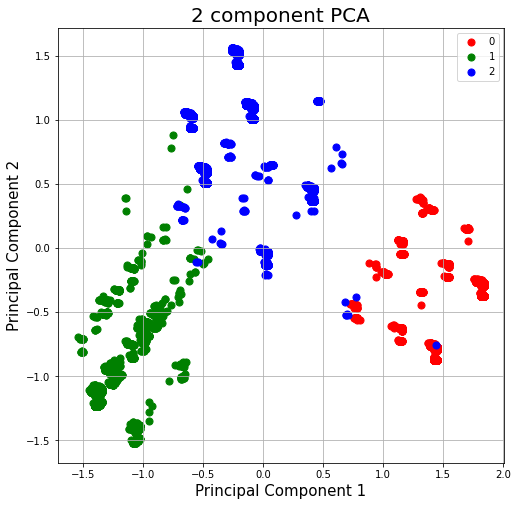

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
for x in [np.array(finalDf_kmenas[0]),np.array(finalDf[0])]: 
  print(f"accuracy: {accuracy_score(clusters_kmode, x)}")
  print('Precision: %.3f' % precision_score(clusters_kmode, x,average='weighted'))
  print('Recall: %.3f' % recall_score(clusters_kmode, x,average='weighted'))
  print('F1 Score: %.3f' % f1_score(clusters_kmode, x,average='weighted'))

accuracy: 0.9245
Precision: 0.942
Recall: 0.924
F1 Score: 0.927
accuracy: 0.0078
Precision: 0.015
Recall: 0.008
F1 Score: 0.010


In [ ]:
data_km_cla

EstadoBeneficiario     Etnia NivelEscolaridad  Genero  \
0                ACTIVO   NINGUNA       SECUNDARIA  Hombre   
1             NO ACTIVO   NINGUNA       SECUNDARIA   Mujer   
2                ACTIVO   NINGUNA       SECUNDARIA  Hombre   
3                ACTIVO  INDIGENA       SECUNDARIA  Hombre   
4                ACTIVO   NINGUNA       SECUNDARIA   Mujer   
...                 ...       ...              ...     ...   
9995             ACTIVO  INDIGENA       SECUNDARIA  Hombre   
9996             ACTIVO   NINGUNA       SECUNDARIA   Mujer   
9997             ACTIVO   NINGUNA         PRIMARIA  Hombre   
9998             ACTIVO   NINGUNA       SECUNDARIA   Mujer   
9999             ACTIVO  INDIGENA         PRIMARIA  Hombre   

             TipoBeneficio TipoPoblacion RangoBeneficioConsolidadoAsignado  \
0     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
1     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
2     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
3     EDUCACIÓN SECUNDARIA     INDIGENAS                     0 - 1.500.000   
4     EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
...                    ...           ...                               ...   
9995  EDUCACIÓN SECUNDARIA     INDIGENAS                     0 - 1.500.000   
9996  EDUCACIÓN SECUNDARIA        SISBEN                     0 - 1.500.000   
9997    EDUCACIÓN PRIMARIA        SISBEN                     0 - 1.500.000   
9998  EDUCACIÓN SECUNDARIA   DESPLAZADOS             4.500.001 - 6.000.000   
9999    EDUCACIÓN PRIMARIA     INDIGENAS                     0 - 1.500.000   

     Titular       rango_idh RangoEdad  labels  
0         NO   (0.719, 0.75]     18-29       0  
1         NO  (0.774, 0.813]     18-29       0  
2         NO   (0.719, 0.75]     18-29       0  
3         NO  (0.638, 0.719]     18-29       0  
4         NO  (0.774, 0.813]     18-29       0  
...      ...             ...       ...     ...  
9995      NO   (0.719, 0.75]     06-17       0  
9996      NO   (0.75, 0.774]     18-29       0  
9997      NO   (0.75, 0.774]     06-17       1  
9998      SI   (0.75, 0.774]     18-29       2  
9999      NO   (0.719, 0.75]     06-17       1  

[10000 rows x 11 columns]

In [ ]:

y = data_km_cla['labels']
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    2
9999    1
Name: labels, Length: 10000, dtype: uint16

# Split train y test

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=0, test_size=0.3)

#Modelo Random Forest

In [ ]:
for i in range(1,10):
  clf = RandomForestClassifier(n_estimators=10,max_depth=i)
  clf = clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  print(i,f"accuracy: {accuracy_score(y_test, pred)}",f"precision: {precision_score(y_test, pred,average='weighted')}", f"recall: {recall_score(y_test, pred,average='weighted')}", f"f1_score: {f1_score(y_test, pred,average='weighted')}")

1 accuracy: 0.8046666666666666 precision: 0.8516733998374243 recall: 0.8046666666666666 f1_score: 0.7275326281655282
2 accuracy: 0.9303333333333333 precision: 0.9327719258145872 recall: 0.9303333333333333 f1_score: 0.9267147517543018
3 accuracy: 0.9296666666666666 precision: 0.9317746233048436 recall: 0.9296666666666666 f1_score: 0.9303557908918603
4 accuracy: 0.9363333333333334 precision: 0.9455807335083753 recall: 0.9363333333333334 f1_score: 0.9379824417104261
5 accuracy: 0.9836666666666667 precision: 0.9844568025186068 recall: 0.9836666666666667 f1_score: 0.9838198655373903
6 accuracy: 0.9573333333333334 precision: 0.9627278474900034 recall: 0.9573333333333334 f1_score: 0.9583921118287277
7 accuracy: 0.979 precision: 0.980449006093257 recall: 0.979 f1_score: 0.9792708435266577
8 accuracy: 0.9926666666666667 precision: 0.9928644057092333 recall: 0.9926666666666667 f1_score: 0.9927037501275771
9 accuracy: 0.992 precision: 0.9921505309847694 recall: 0.992 f1_score: 0.9920305649580949


In [ ]:
clf = RandomForestClassifier(n_estimators=10,max_depth=4)
clf = clf.fit(X_train, y_train)

In [ ]:
pred = clf.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, pred)}",f"precision: {precision_score(y_test, pred,average='weighted')}", f"recall: {recall_score(y_test, pred,average='weighted')}", f"f1_score: {f1_score(y_test, pred,average='weighted')}")

accuracy: 0.958 precision: 0.9626125437085432 recall: 0.958 f1_score: 0.9589049947376675


In [ ]:
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.949, 0.951, 0.942, 0.945, 0.928, 0.961, 0.942, 0.946, 0.927,
       0.936])

In [ ]:
estimator = clf.estimators_[3]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = ['0','1','2'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
data_km_cla.groupby(['labels','RangoBeneficioConsolidadoAsignado']).size()

labels  RangoBeneficioConsolidadoAsignado
0       0 - 1.500.000                        4977
        1.500.001 - 3.000.000                  45
        3.000.001 - 4.500.000                 171
        4.500.001 - 6.000.000                 126
        > 6.000.001                            80
1       0 - 1.500.000                        2717
2       0 - 1.500.000                         225
        1.500.001 - 3.000.000                 582
        3.000.001 - 4.500.000                 449
        4.500.001 - 6.000.000                 373
        > 6.000.001                           255
dtype: int64

#Validacion con SVM y con Multinomial Naive Bayes

In [ ]:
for x in [0.1,0.2,0.3]:
  X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=0, test_size=x)
  mnb = MultinomialNB()
  mnb.fit(X_train, y_train)
  pred = mnb.predict(X_test)
  print(f"accuracy Multinomial test_size: {x} ,{accuracy_score(y_test, pred)}",f"precision: {precision_score(y_test, pred,average='weighted')}", f"recall: {recall_score(y_test, pred,average='weighted')}", f"f1_score: {f1_score(y_test, pred,average='weighted')}")
  poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
  pred = poly.predict(X_test)
  print(f"accuracy Support vector machine test_size: {x} , {accuracy_score(y_test, pred)}",f"precision: {precision_score(y_test, pred,average='weighted')}", f"recall: {recall_score(y_test, pred,average='weighted')}", f"f1_score: {f1_score(y_test, pred,average='weighted')}")


accuracy Multinomial test_size: 0.1 ,0.942 precision: 0.9530399293177775 recall: 0.942 f1_score: 0.9439155766832595
accuracy Support vector machine test_size: 0.1 , 0.999 precision: 0.9990018315018315 recall: 0.999 f1_score: 0.9989990337937176
accuracy Multinomial test_size: 0.2 ,0.9345 precision: 0.9457509090388834 recall: 0.9345 f1_score: 0.9362648622830428
accuracy Support vector machine test_size: 0.2 , 0.9995 precision: 0.9995004591368227 recall: 0.9995 f1_score: 0.9994997756239058
accuracy Multinomial test_size: 0.3 ,0.9343333333333333 precision: 0.946512821582282 recall: 0.9343333333333333 f1_score: 0.9361463189737428
accuracy Support vector machine test_size: 0.3 , 0.9996666666666667 precision: 0.9996668695475756 recall: 0.9996666666666667 f1_score: 0.999666570300245
